<b>Context</b>

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

<b>Content</b>

Each app (row) has values for catergory, rating, size, and more.


<b>Acknowledgements</b>

This information is scraped from the Google Play Store. This app information would not be available without it.


<b>Inspiration</b>

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

Below is data description of googleplaystore dataset.

- App Name :The name of the app
- Category :Category to which the app belongs
- Rating :Rating value of the app
- Reviews :Review count
- Installs :Number of verified installs
- Size :Size of the app
- Price :Price of the app in $ dollars
- Content Rating :Intended audience or age group targeted
- Last Updated :Last Updated date
- Minimum Version :Minimum Android version required to run the app
- Latest Version :Current version of the app
    
    
Below is data description of googleplaystore_user_reviews dataset.

- App :The name of the app
- Translated_Review: Reviews in english translated from various languages
- Sentiment: Look out toward app i.e positive or negative.
- Sentiment_Polarity: how sure a person is about his/her sentiment.
- Sentiment_Subjectivity:how subjective review is.

# Data Acquisition

In [371]:
import numpy   as np
import pandas  as pd
googleplaystore=pd.read_csv('C:/Users/harsh/Desktop/into to python/PROJECT/googleplaystore.csv')
googleplaystore_user_reviews=pd.read_csv('C:/Users/harsh/Desktop/into to python/PROJECT/googleplaystore_user_reviews.csv') 

# Data Exploration and Cleaning

In [372]:
googleplaystore.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [373]:
googleplaystore_user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [374]:
print('Shape of the googleplaystore_user_reviews Data is ',googleplaystore_user_reviews.shape)
print('Shape of the googleplaystore Data is ',googleplaystore.shape)

Shape of the googleplaystore_user_reviews Data is  (64295, 5)
Shape of the googleplaystore Data is  (10841, 13)


In [375]:
googleplaystore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [376]:
googleplaystore_user_reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [377]:
googleplaystore= googleplaystore[googleplaystore['Rating']<=5]

In [378]:
#Checking and droping NA values in both the data set
#function to find missing values in a data frame is created 
def missing_values(data_frame):
    percent_missing = data_frame.isnull().sum() * 100 / len(data_frame)
    return percent_missing

In [379]:
missing_values(googleplaystore)

App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.042708
Android Ver       0.021354
dtype: float64

In [380]:
missing_values(googleplaystore_user_reviews)

App                        0.000000
Translated_Review         41.788631
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64

So dropping all mising values in googleplaystore_user_reviews dataset.

In [381]:
googleplaystore_user_reviews.dropna(inplace = True)

In [382]:
googleplaystore_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Rating')

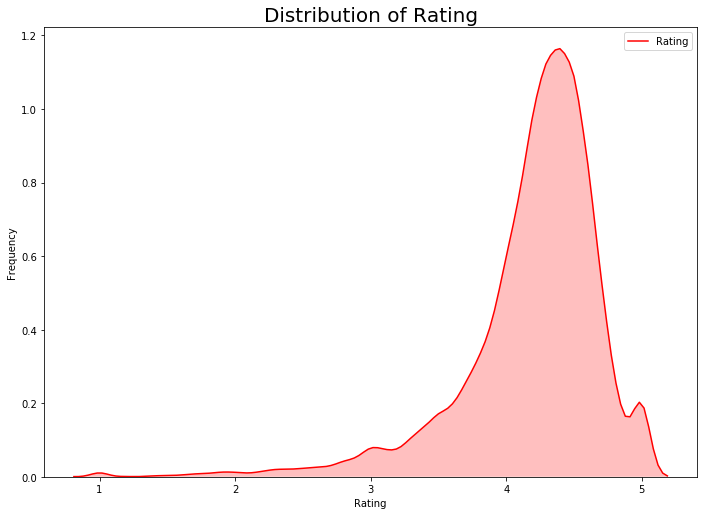

In [383]:
# rating distibution 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(googleplaystore.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Its quite clear frquency of the rating is very much concentrated close to 4. 

Text(0.5, 1.0, 'Count of app in each category')

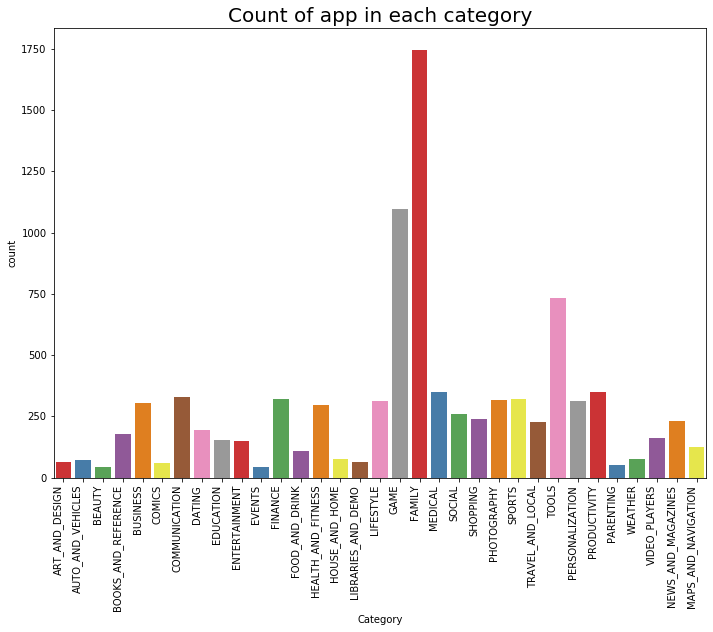

In [384]:
g = sns.countplot(x="Category",data=googleplaystore, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

We can see category GAME and FAMILY have highest number of counts.

[]

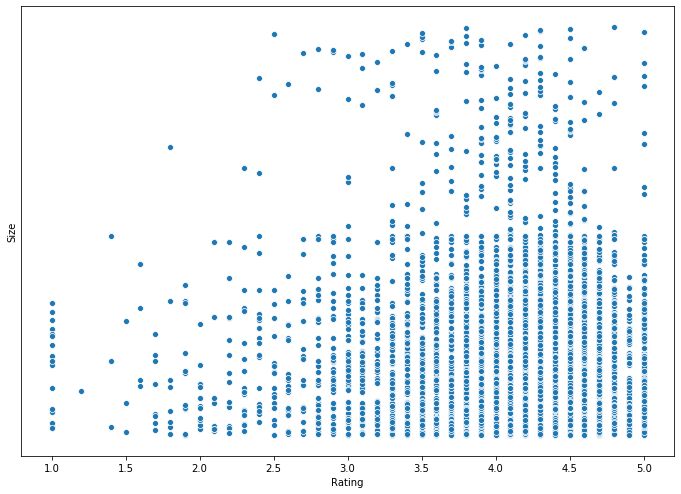

In [385]:
ax = sns.scatterplot(x="Rating", y="Size", data=googleplaystore)
ax.set_yticklabels([])
ax.set_yticks([])

So from above we can say app which are moderate and less in size are comapritively more popular than app which are really big in size.

In [386]:
googleplaystore_user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [387]:
googleplaystore_user_reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

We need to creat dummy variables as sentiment data type is object and it has categorical values.

In [388]:
googleplaystore_user_reviews_dummies=pd.get_dummies(googleplaystore_user_reviews, columns=['Sentiment'])

Merging  googleplaystore and googleplaystore_user_reviews to do further analysis.We have common column as App so we merge on it.

In [389]:
merge_data=pd.merge(googleplaystore, googleplaystore_user_reviews_dummies,on="App")
merge_data.shape   

(72566, 19)

In [390]:
merge_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,-0.250,1.000000,1,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,-0.725,0.833333,1,0,0
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,0.000,0.000000,0,1,0
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,0.500,0.600000,0,0,1
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,-0.800,0.900000,1,0,0


In [391]:
df_2=merge_data.groupby('App').agg({'Sentiment_Negative': 'sum', 'Sentiment_Neutral': 'sum','Sentiment_Positive': 'sum'})
df_2.sort_values(by=['Sentiment_Positive'],ascending=False).head(10)

,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
App,,,
Duolingo: Learn Languages Free,238.0,42,1400.0
Helix Jump,348.0,36,1254.0
Bowmasters,714.0,144,1014.0
"CBS Sports App - Scores, News, Stats & Watch Live",336.0,216,984.0
Calorie Counter - MyFitnessPal,260.0,165,845.0
8 Ball Pool,742.0,63,728.0
Candy Crush Saga,882.0,84,714.0
Angry Birds Classic,735.0,10,620.0
Bubble Shooter,240.0,30,600.0


From above we can see top 10 app with most positive sentiments.

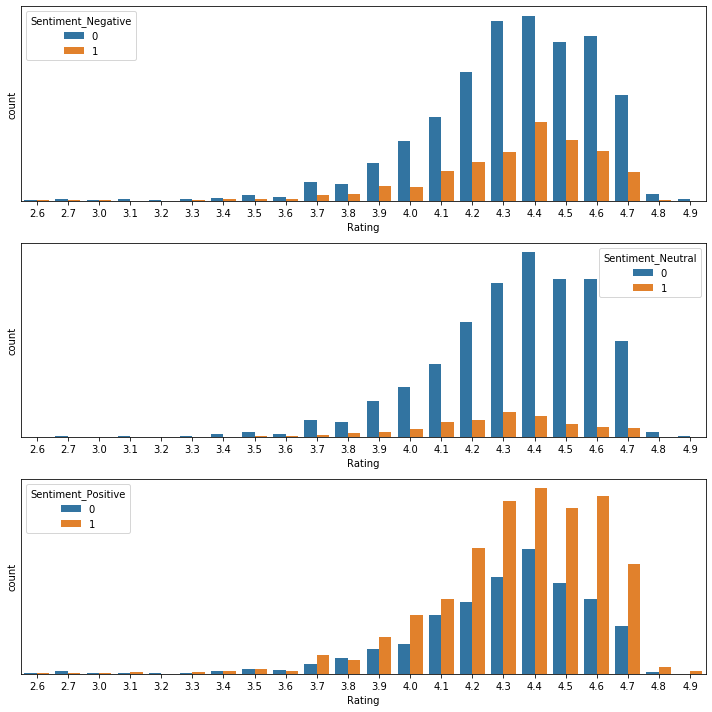

In [392]:
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

sns.countplot(merge_data["Rating"],hue = merge_data["Sentiment_Negative"],ax = axes[0])
sns.countplot(merge_data["Rating"],hue = merge_data["Sentiment_Neutral"],ax = axes[1])
sns.countplot(merge_data["Rating"],hue = merge_data["Sentiment_Positive"],ax = axes[2])
plt.setp(axes, yticks=[])
plt.tight_layout()

Its quite clear that positive sentiment is evident at higher rating,and with negative sentiment decrease with increase rating.
Neutral sentiment on the other hand do not have any significant effect due to increase in rating.

In [393]:
googleplaystore_user_reviews.head()
merge_data2=pd.merge(googleplaystore, googleplaystore_user_reviews,on="App")
merge_data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Text(0.5, 1.0, 'Sentiments Distribution')

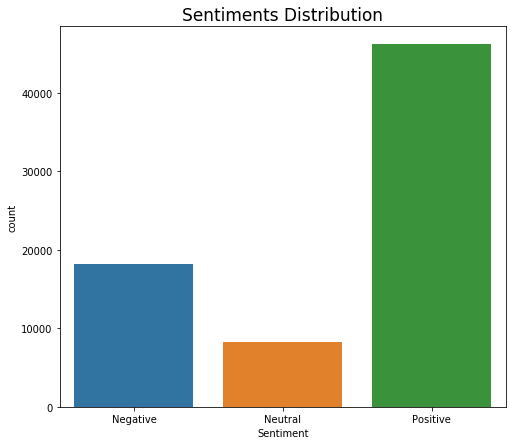

In [394]:
fig = plt.figure(figsize = (8,7))
sns.countplot(data=merge_data2, x = 'Sentiment')
plt.title('Sentiments Distribution', fontsize=17)

Distribution of sentiments clearly shows that in all positive sentiments are more in numbers,followed by negative sentiments.
Also it is interesting to know that neutral sentiments are least given.

Text(0.5, 1.0, 'Rating Distribution')

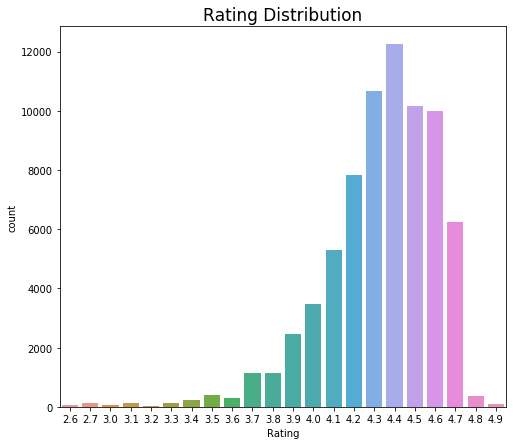

In [395]:
fig = plt.figure(figsize = (8,7))
sns.countplot(data=merge_data2, x = 'Rating')
plt.title('Rating Distribution', fontsize=17)

Distribution of rating shows it is almost normally distributed and skewed left.Also it is quite clear ratings mostly lie between 4 to 4.8.

<Figure size 864x720 with 0 Axes>

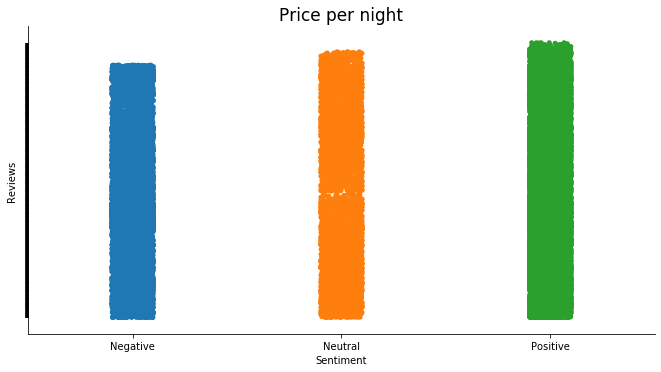

In [396]:
plt.figure(figsize = (12,10))
ax=sns.catplot(x = 'Sentiment', y = 'Reviews',aspect=2, data=merge_data2,height=5);
plt.title('Price per night', fontsize=17)
ax.set_yticklabels([])


Coming to reviews , we can see reviews are almost equally distributed to all the three sentiments.

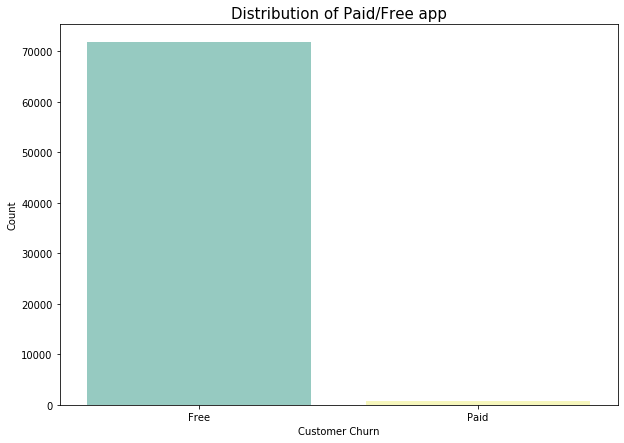

In [397]:
fig = plt.figure(figsize = (10,7))
ax=sns.countplot(x='Type',palette="Set3", data=merge_data)
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
plt.title("Distribution of Paid/Free app", fontsize=15)
plt.show()

It is clear insight that Free apps are widely available and paid app cover really small section of total data we have.

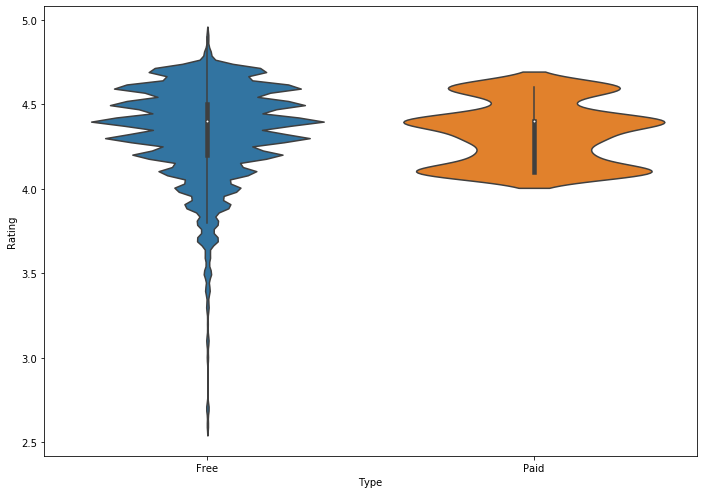

In [398]:
sns.violinplot(x="Type", y="Rating", data=merge_data2);

It is intesting to know from above that paid app mostly get high rating i.e from 4 to 5.

# Data Processing

In this section data type of our final dataset is changed to make it suitable to apply in different model . I converted each category into an individual number i.e integer encoding is used

In [399]:
merge_data.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                    object
Size                       object
Installs                   object
Type                       object
Price                      object
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Translated_Review          object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
Sentiment_Negative          uint8
Sentiment_Neutral           uint8
Sentiment_Positive          uint8
dtype: object

In [400]:
# converting Categories into integers
Category_String = merge_data["Category"]
category_Val = merge_data["Category"].unique()
category_ValCount = len(category_Val)
category_dict = {}
for i in range(0,category_ValCount):
    category_dict[category_Val[i]] = i
merge_data["Category_c"] = merge_data["Category"].map(category_dict).astype(int)

In [401]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

merge_data['Type'] = merge_data['Type'].map(type_cat)

In [402]:
#Converting content rating classification
RatingL = merge_data['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
merge_data['Content Rating'] = merge_data['Content Rating'].map(RatingDict).astype(int)

In [403]:
#Converting  genres into int
GenresL = merge_data.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
merge_data['Genres_c'] = merge_data['Genres'].map(GenresDict).astype(int)

In [404]:
#Converting prices into float
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

merge_data['Price'] = merge_data['Price'].map(price_clean).astype(float)

In [405]:
#Converting reviews to numeric
merge_data['Reviews'] = merge_data['Reviews'].astype(int)

In [406]:
#Dropping following columns as I consider them unecessary for our machine learning algorithm
merge_data.drop(labels = ['App',"Genres",'Size','Last Updated', 'Current Ver','Installs','Android Ver', 'Translated_Review', 'Sentiment_Polarity','Sentiment_Subjectivity'], axis = 1, inplace = True)

In [407]:
merge_data.dtypes

Category               object
Rating                float64
Reviews                 int32
Type                    int64
Price                 float64
Content Rating          int32
Sentiment_Negative      uint8
Sentiment_Neutral       uint8
Sentiment_Positive      uint8
Category_c              int32
Genres_c                int32
dtype: object

In [408]:
#dropping all NA values
merge_data.dropna(inplace = True)

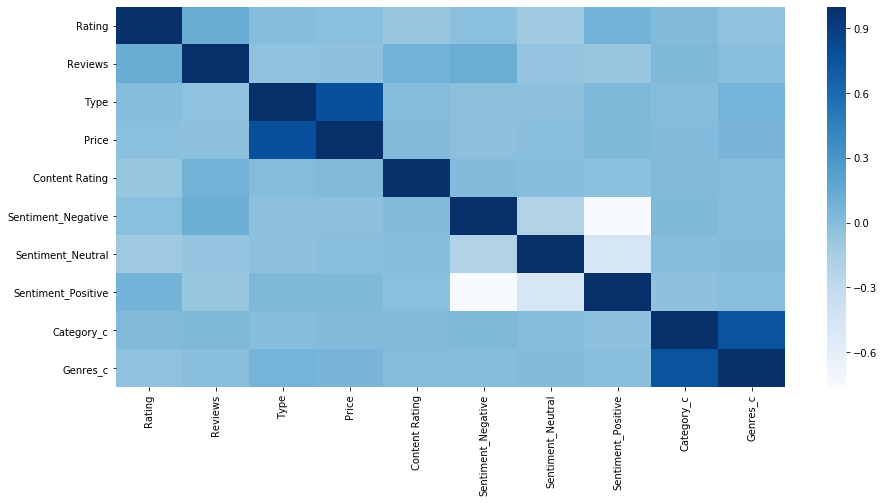

In [409]:
corr=merge_data.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(15,7))
sns.heatmap(corr,annot=False,cmap='Blues')

From above it is quite clear that Genere and category have high correlation.
Also , price and type also show strong correlation.

In [410]:
#The following is code to obtain the error terms for the various models, 
#
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))
    
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

# Modelling

Goal of modelling is to see if we can use existing data(e.g. Type, no of reviews) to predict the ratings of the google applications. In other words, our dependent variable Y, would be the rating of the apps.

# Linear Regression Model

In [411]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline
#Integer encoding
X = merge_data.drop(labels = ['Category','Rating'],axis = 1)
y = merge_data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

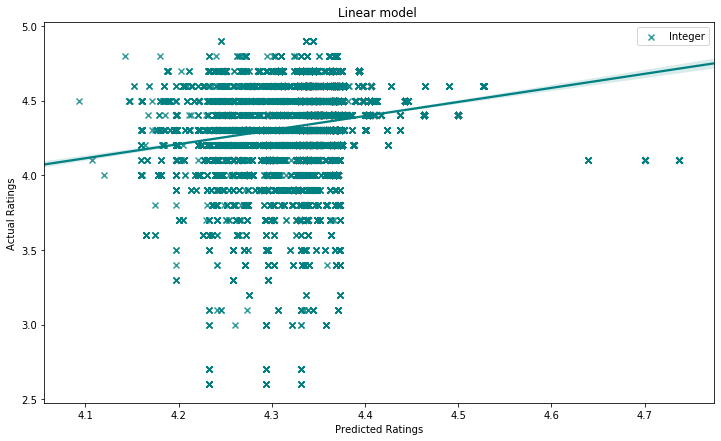

In [412]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
plt.legend()
plt.title('Linear model ')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [413]:
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Integer encoding(std) :' + str(Results.std()))

Integer encoding(mean) :4.33424894443737
Integer encoding(std) :0.05853510198667458


Out of Sample Mean Square Error of the Linear Regression Model

In [414]:
(np.sum((y_test-Results)**2))/len(y_test)

0.07511603536734361

# Support Vector Regressor Model

In [415]:
from sklearn import svm
svr_m = svm.SVR()
svr_m.fit(X_train,y_train)
svr_m_test_pred = svr_m.predict(X_test)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [416]:
print ('SVM Out of Sample (mean) :'+ str(svr_m_test_pred.mean()))
print ('SVM Out of Sample (std) :'+ str(svr_m_test_pred.std()))

SVM Out of Sample (mean) :4.308378912014911
SVM Out of Sample (std) :0.21210245759415597


Out of Sample MSE of the Support Vector Regressor

In [417]:
(np.sum((y_test-svr_m_test_pred)**2))/len(y_test)

0.008540743074497903

# Decision Tree Regression Model:

In [418]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_test_pred = dtr.predict(X_test)

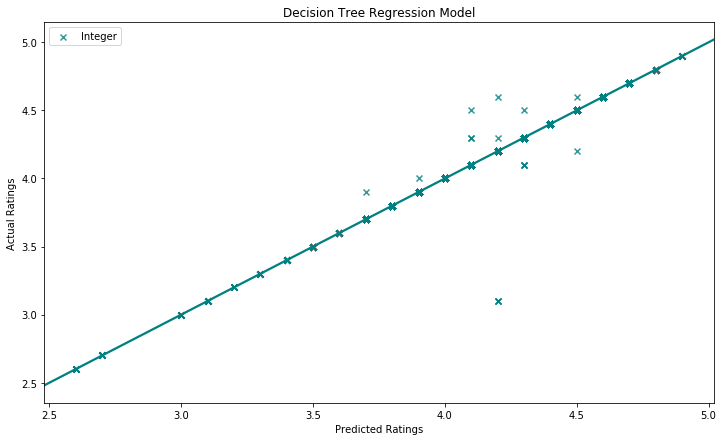

In [419]:
plt.figure(figsize=(12,7))
sns.regplot(dtr_test_pred,y_test,color='teal', label = 'Integer', marker = 'x')
plt.legend()
plt.title('Decision Tree Regression Model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

Out of Sample MSE of the Decision Tree Regressor

In [420]:
(np.sum((y_test-dtr_test_pred)**2))/len(y_test)

0.00019981626090950885

In [421]:
print ('DecisionTreeRegressor Out of Sample (mean) :'+ str(dtr_test_pred.mean()))
print ('DecisionTreeRegressor Out of Sample (std) :'+ str(dtr_test_pred.std()))

DecisionTreeRegressor Out of Sample (mean) :4.334166283876877
DecisionTreeRegressor Out of Sample (std) :0.27918668528238105



# Model Evaluation


So from above we can conclude that:


- MSE of the Linear Regression Model    0.07667071477196015
- MSE of the Support Vector Regressor   0.008340506389973346
- MSE of the Decision Tree Regressor    1.1943040881947903e-05



So Decision Tree Regressor model gives best model with least MSE. We will now see which features are most important in predicting the ratings in Decision Trees Regressor

# Conclusion

<Figure size 504x504 with 0 Axes>

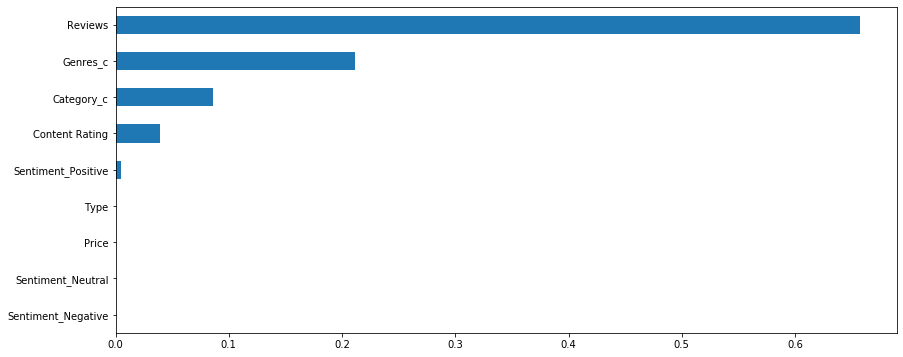

In [422]:
Feat_impt = {}
for col,feat in zip(X.columns,dtr.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (7,7))
Feat_impt_df.plot(kind = 'barh',figsize= (14,6),legend = False)
plt.show()

Hence, we can conclude that the most important Features in predicting the Ratings are:
    - Reviews
    - Genres
    - Category
    - Content Rating
    - Sentiment Positive
    
And the rest of the features are not SIGNIFICANT in predicting the ratings